# **Projet : Spam Detector**

# Partie 0 : Import du dataset et des libraries

In [1]:
import pandas as pd
import numpy as np
import sklearn
import tensorflow_datasets as tfds
import tensorflow as tf
tf.__version__

'2.15.0'

In [3]:
dataset = pd.read_csv("/data/spam.csv", encoding='latin1')
dataset.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
dataset.shape

(5572, 5)

# Partie 1 : Exploration des données et Preprocessing

## Exploration des données

Regardons à quoi peuvent bien correspondre les colonnes "Unnamed: 2", "Unnamed: 3" et "Unnamed: 4".

In [5]:
dataset["Unnamed: 2"].value_counts(dropna=False)

NaN                                                                                                                                                 5522
 bt not his girlfrnd... G o o d n i g h t . . .@"                                                                                                      3
 PO Box 5249                                                                                                                                           2
this wont even start........ Datz confidence.."                                                                                                        2
GN                                                                                                                                                     2
 don't miss ur best life for anything... Gud nyt..."                                                                                                   2
 but dont try to prove it..\" .Gud noon...."                                      

In [6]:
dataset["Unnamed: 3"].value_counts(dropna=False)

NaN                                           5560
 MK17 92H. 450Ppw 16"                            2
GE                                               2
 why to miss them                                1
U NO THECD ISV.IMPORTANT TOME 4 2MORO\""         1
i wil tolerat.bcs ur my someone..... But         1
 ILLSPEAK 2 U2MORO WEN IM NOT ASLEEP...\""       1
whoever is the KING\"!... Gud nyt"               1
 TX 4 FONIN HON                                  1
 \"OH No! COMPETITION\". Who knew                1
IåÕL CALL U\""                                   1
Name: Unnamed: 3, dtype: int64

In [7]:
dataset["Unnamed: 4"].value_counts(dropna=False)

NaN                                                         5566
GNT:-)"                                                        2
 just Keep-in-touch\" gdeve.."                                 1
 Never comfort me with a lie\" gud ni8 and sweet dreams"       1
 CALL 2MWEN IM BK FRMCLOUD 9! J X\""                           1
 one day these two will become FREINDS FOREVER!"               1
Name: Unnamed: 4, dtype: int64

Afficons les lignes où la colonne "Unnamed: 4" n'est pas nul.

In [8]:
dataset[~dataset["Unnamed: 4"].isna()]

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
281,ham,\Wen u miss someone,the person is definitely special for u..... B...,why to miss them,"just Keep-in-touch\"" gdeve.."""
1038,ham,"Edison has rightly said, \A fool can ask more ...",GN,GE,"GNT:-)"""
2255,ham,I just lov this line: \Hurt me with the truth,I don't mind,i wil tolerat.bcs ur my someone..... But,"Never comfort me with a lie\"" gud ni8 and swe..."
3525,ham,\HEY BABE! FAR 2 SPUN-OUT 2 SPK AT DA MO... DE...,HAD A COOL NYTHO,TX 4 FONIN HON,"CALL 2MWEN IM BK FRMCLOUD 9! J X\"""""
4668,ham,"When I was born, GOD said, \Oh No! Another IDI...",GOD said,"\""OH No! COMPETITION\"". Who knew","one day these two will become FREINDS FOREVER!"""
5048,ham,"Edison has rightly said, \A fool can ask more ...",GN,GE,"GNT:-)"""


On fait une concatenation de la ligne 281

In [9]:
sentence = ''
for i in range(1,5):
  sentence += dataset[dataset.columns[i]][281]

sentence

'\\Wen u miss someone the person is definitely special for u..... But if the person is so special why to miss them just Keep-in-touch\\" gdeve.."'

De ce que je comprends, la plupart des messages se trouvent dans la colonne v2. Cependant, pour certains messages, seul le début est inscrit dans la colonne v2, et la suite est inscrite dans les colonnes "Unnamed: 2", "Unnamed: 3" et "Unnamed: 4". \
Ainsi il va falloir concatener les colonnes v2, "Unnamed: 2", "Unnamed: 3" et "Unnamed: 4" pour avoir les messages en entier.

Mais dans un premier temps, renommons les colonnes pour plus de clarté.

In [10]:
dataset_clean = dataset.copy()
dataset_clean.columns = ["target", "message_debut", "message_suite_1", "message_suite_2", "message_fin"]
dataset_clean.head()

,target,message_debut,message_suite_1,message_suite_2,message_fin
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


Concatenons les 4 dernières colonnes. \
Pour cela, on va remplacer tous les NaN par ' '.

In [11]:
dataset_clean["message_suite_1"][dataset_clean["message_suite_1"].isna()] = ''
dataset_clean["message_suite_2"][dataset_clean["message_suite_2"].isna()] = ''
dataset_clean["message_fin"][dataset_clean["message_fin"].isna()] = ''
dataset_clean.head()

,target,message_debut,message_suite_1,message_suite_2,message_fin
0,ham,"Go until jurong point, crazy.. Available only ...",,,
1,ham,Ok lar... Joking wif u oni...,,,
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,,,
3,ham,U dun say so early hor... U c already then say...,,,
4,ham,"Nah I don't think he goes to usf, he lives aro...",,,


In [12]:
columns = dataset_clean["message_debut"].copy()
for i in range(2,5):
  columns += ' ' + dataset_clean[dataset_clean.columns[i]] # On met un espace pour séparer les chaines de caractères présents dans les colonnes (sinon, risque que 2 mots soient collés)
# Si jamais l'espace crée un double espace, ce n'est pas grave puisqu'on enlevera tous les doubles-espaces dans la partie Preprocessing

# On vérifie ce que l'on a fait sur les 6 lignes dont la colonne "message_fin" n'est pas nul
print(columns[281])
print(columns[1038])
print(columns[2255])
print(columns[3525])
print(columns[4668])
print(columns[5048])

\Wen u miss someone  the person is definitely special for u..... But if the person is so special  why to miss them  just Keep-in-touch\" gdeve.."
Edison has rightly said, \A fool can ask more questions than a wise man can answer\" Now you know why all of us are speechless during ViVa.. GM GN GE GNT:-)"
I just lov this line: \Hurt me with the truth  I don't mind i wil tolerat.bcs ur my someone..... But  Never comfort me with a lie\" gud ni8 and sweet dreams"
\HEY BABE! FAR 2 SPUN-OUT 2 SPK AT DA MO... DEAD 2 DA WRLD. BEEN SLEEPING ON DA SOFA ALL DAY  HAD A COOL NYTHO  TX 4 FONIN HON  CALL 2MWEN IM BK FRMCLOUD 9! J X\""
When I was born, GOD said, \Oh No! Another IDIOT\". When you were born  GOD said  \"OH No! COMPETITION\". Who knew  one day these two will become FREINDS FOREVER!"
Edison has rightly said, \A fool can ask more questions than a wise man can answer\" Now you know why all of us are speechless during ViVa.. GM GN GE GNT:-)"


Parfait ! On peut mettre columns dans dataset_clean !

In [13]:
dataset_clean["message"] = columns
dataset_clean.head()

,target,message_debut,message_suite_1,message_suite_2,message_fin,message
0,ham,"Go until jurong point, crazy.. Available only ...",,,,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...,,,,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,,,,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...,,,,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro...",,,,"Nah I don't think he goes to usf, he lives aro..."


On supprime les colonnes "message_debut", "message_suite_1", "message_suite_2" et "message_fin".

In [14]:
dataset_clean = dataset_clean.drop(["message_debut", "message_suite_1", "message_suite_2", "message_fin"], axis=1)
dataset_clean.head()

,target,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Regardons la variable target.

In [15]:
dataset_clean["target"].value_counts(dropna=False)

ham     4825
spam     747
Name: target, dtype: int64

Il ne manque pas de valeurs dans la colonne "target". \
Il n'y a que 2 classes : "spam" et "ham".

## Preprocessing

On crée notre nlp.

In [16]:
import en_core_web_sm
nlp = en_core_web_sm.load()

On importe les STOP_WORDS anglais.

In [17]:
from spacy.lang.en.stop_words import STOP_WORDS

On nettoie des messages

In [18]:
dataset_clean["message_clean"] = dataset_clean["message"].apply(lambda x : ''.join(ch for ch in x if ch.isalnum() or ch==" ")) # On ne garde que les caractères alphanumériques

dataset_clean["message_clean"] = dataset_clean["message_clean"].apply(lambda x : x.replace(" +", " ").lower().strip()) # On enlève les double-espaces (ainsi que les espaces en début et fin de message) et on met tout en minuscule

dataset_clean["message_clean"] = dataset_clean["message_clean"].apply(lambda x : ' '.join([token.lemma_ for token in nlp(x) if (token.lemma_ not in STOP_WORDS) & (token.text not in STOP_WORDS)])) # On lemmatise les mots et on enlève tous les STOP WORDS

dataset_clean.head()

,target,message,message_clean
0,ham,"Go until jurong point, crazy.. Available only ...",jurong point crazy available bugis n great wor...
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,u dun early hor u c
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think usf live


Regardons s'il y a des messages qui ont été totalement supprimés.

In [19]:
mask = dataset_clean["message_clean"].apply(lambda x : type(x) == str)
mask.value_counts()

True    5572
Name: message_clean, dtype: int64

Il n'y a pas de messages totalement supprimés.

On encode nos messages, en ne gardant que les 1000 mots les plus courants. Les mots qui ne font pas partis de ces 1000 mots vont être encodés par 1.

In [20]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=1000, oov_token='oov') # On conserve les 1000 premiers mots les plus courants
# oov_token = "oov" -> tous les mots qui ne sont pas conservés vont être encodés par 1

tokenizer.fit_on_texts(dataset_clean["message_clean"])

dataset_clean["message_encoded"] = tokenizer.texts_to_sequences(dataset_clean.message_clean) # On encode nos mots

In [21]:
dataset_clean.head()

,target,message,message_clean,message_encoded
0,ham,"Go until jurong point, crazy.. Available only ...",jurong point crazy available bugis n great wor...,"[1, 234, 449, 464, 946, 36, 53, 206, 947, 79, ..."
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni,"[11, 195, 465, 290, 2, 1]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,"[13, 299, 4, 536, 668, 34, 1, 859, 425, 1, 1, ..."
3,ham,U dun say so early hor... U c already then say...,u dun early hor u c,"[2, 126, 151, 1, 2, 86]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think usf live,"[713, 23, 669, 130]"


On rajoute des 0 à la fin des messages encodés afin que tous les messages encodés fassent la même taille.

In [22]:
messages_pad = tf.keras.preprocessing.sequence.pad_sequences(dataset_clean["message_encoded"], padding="post")

In [23]:
messages_pad[0,:]

array([  1, 234, 449, 464, 946,  36,  53, 206, 947,  79,   1, 948,   1,
        59,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0], dtype=int32)

In [24]:
messages_pad.shape

(5572, 72)

Chaque message a une longueur de 72 mots.

On encode notre target.

In [25]:
nb_class = len(dataset_clean["target"].value_counts())
dataset_clean["target_num"] = [0 for i in range(dataset_clean.shape[0])] # Colonne où la target sera encodée

for i in range(nb_class):
  dataset_clean["target_num"][dataset_clean["target"] == dataset_clean["target"].unique()[i]] = i

dataset_clean.head()

<ipython-input-25-085916874dee>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_clean["target_num"][dataset_clean["target"] == dataset_clean["target"].unique()[i]] = i


,target,message,message_clean,message_encoded,target_num
0,ham,"Go until jurong point, crazy.. Available only ...",jurong point crazy available bugis n great wor...,"[1, 234, 449, 464, 946, 36, 53, 206, 947, 79, ...",0
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni,"[11, 195, 465, 290, 2, 1]",0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,"[13, 299, 4, 536, 668, 34, 1, 859, 425, 1, 1, ...",1
3,ham,U dun say so early hor... U c already then say...,u dun early hor u c,"[2, 126, 151, 1, 2, 86]",0
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think usf live,"[713, 23, 669, 130]",0


On divise notre dataset en un set de train, un set de validation et un set de test.

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(messages_pad, dataset_clean["target_num"], test_size=0.2, random_state=42, stratify=dataset_clean["target"])
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=42, stratify=y_val)

On mélange les données et on crée nos batchs.

In [27]:
train = tf.data.Dataset.from_tensor_slices((X_train, y_train))
val = tf.data.Dataset.from_tensor_slices((X_val, y_val))
test = tf.data.Dataset.from_tensor_slices((X_test, y_test))

train_batch = train.shuffle(len(train)).batch(64)
val_batch = val.shuffle(len(val)).batch(64)
test_batch = test.shuffle(len(val)).batch(64)

Regardons à quoi ressemble 1 batch.

In [28]:
for message, target in train_batch.take(1):
  print(message, target)

tf.Tensor(
[[  1  83 767 ...   0   0   0]
 [ 56   7   1 ...   0   0   0]
 [  1 161 292 ...   0   0   0]
 ...
 [  3   3  32 ...   0   0   0]
 [ 99 314   5 ...   0   0   0]
 [ 15 268   1 ...   0   0   0]], shape=(64, 72), dtype=int32) tf.Tensor(
[0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0], shape=(64,), dtype=int64)


# Partie 2 : Réseau de neurones simple (Word Embedding)

On va commencer par entrainer un réseau extrêment simple :
- une couche d'Embedding
- une couche dense pour classifier

In [29]:
from tensorflow.keras.layers import Embedding, Dense, Flatten
vocab_size = 1000 # On a gardé que les 1000 mots les plus fréquents

In [30]:
model_embedding = tf.keras.Sequential([
    Embedding(vocab_size, 128, input_shape=[messages_pad.shape[1],],name="embedding", mask_zero=True), # mask_zero=True -> Interprète le 0 comme un padding
    Flatten(), # On met sur une dimension l'output de la couche Embedding
    Dense(1, activation='sigmoid')
])

In [31]:
model_embedding.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 72, 128)           128000    
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 1)                 9217      
                                                                 
Total params: 137217 (536.00 KB)
Trainable params: 137217 (536.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


On compile le modèle.

In [32]:
model_embedding.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy()])

On entraine notre modèle

In [33]:
history = model_embedding.fit(train_batch, epochs=15, validation_data=val_batch)

Epoch 1/15
70/70 [==============================] - 7s 75ms/step - loss: 0.3074 - binary_accuracy: 0.8721 - val_loss: 0.1873 - val_binary_accuracy: 0.9300
Epoch 2/15
70/70 [==============================] - 2s 33ms/step - loss: 0.1250 - binary_accuracy: 0.9625 - val_loss: 0.1048 - val_binary_accuracy: 0.9713
Epoch 3/15
70/70 [==============================] - 1s 16ms/step - loss: 0.0670 - binary_accuracy: 0.9816 - val_loss: 0.0778 - val_binary_accuracy: 0.9749
Epoch 4/15
70/70 [==============================] - 1s 14ms/step - loss: 0.0449 - binary_accuracy: 0.9879 - val_loss: 0.0685 - val_binary_accuracy: 0.9803
Epoch 5/15
70/70 [==============================] - 1s 9ms/step - loss: 0.0336 - binary_accuracy: 0.9908 - val_loss: 0.0666 - val_binary_accuracy: 0.9838
Epoch 6/15
70/70 [==============================] - 0s 6ms/step - loss: 0.0263 - binary_accuracy: 0.9933 - val_loss: 0.0687 - val_binary_accuracy: 0.9820
Epoch 7/15
70/70 [==============================] - 1s 8ms/step - loss: 

Regardons les courbes de perte et d'accuracy en fonction de l'epoch.

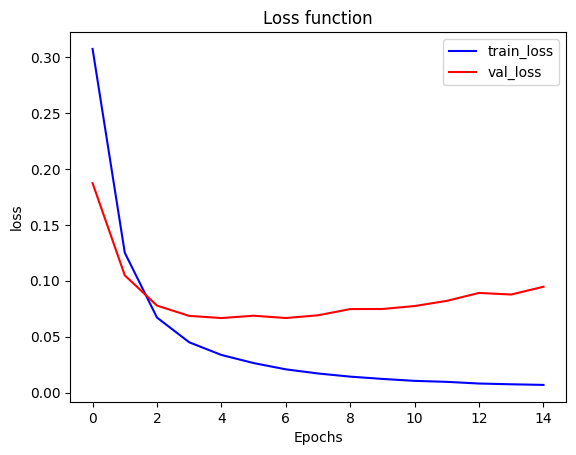

In [34]:
import matplotlib.pyplot as plt

plt.plot(history.history["loss"], color="b", label="train_loss")
plt.plot(history.history["val_loss"], color="r", label="val_loss")
plt.ylabel("loss")
plt.xlabel("Epochs")
plt.title("Loss function")
plt.legend()
plt.show()

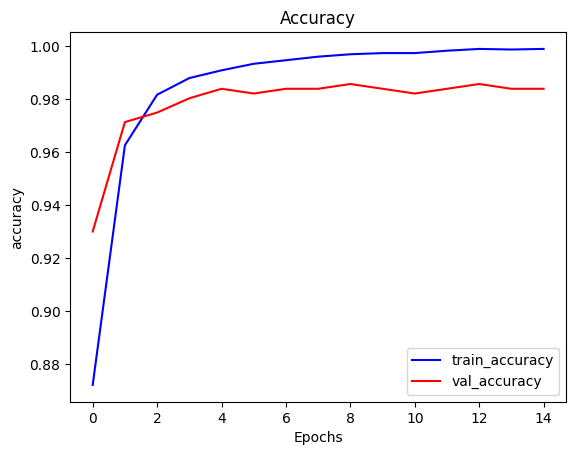

In [35]:
plt.plot(history.history["binary_accuracy"], color="b", label="train_accuracy")
plt.plot(history.history["val_binary_accuracy"], color="r", label="val_accuracy")
plt.ylabel("accuracy")
plt.xlabel("Epochs")
plt.title("Accuracy")
plt.legend()
plt.show()

On remarque que le modèle apprend très rapidement. De plus, rajouter des époques risquerait d'overfitter le modèle. \
On sauvegarde puis on restore le modèle.


In [39]:
# Sauvegarde du modèle
# model_embedding.save("/data/model_embedding.h5")
model_embedding = tf.keras.models.load_model("/data/model_embedding.h5")

Faisons des prédictions sur le test set et regardons les scores.

In [40]:
from sklearn.metrics import classification_report

In [41]:
predictions = model_embedding.predict(X_test)
predictions = predictions.reshape(-1)
results = pd.DataFrame({"test" : y_test, "pred" : predictions})
results["pred"] = round(results["pred"])
print(classification_report(results["test"], results["pred"]))

18/18 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       483
           1       0.99      0.91      0.94        75

    accuracy                           0.99       558
   macro avg       0.99      0.95      0.97       558
weighted avg       0.99      0.99      0.99       558



Le f1-score du modèle est très bon ! \
Regardons la matrice de confusion.

In [42]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

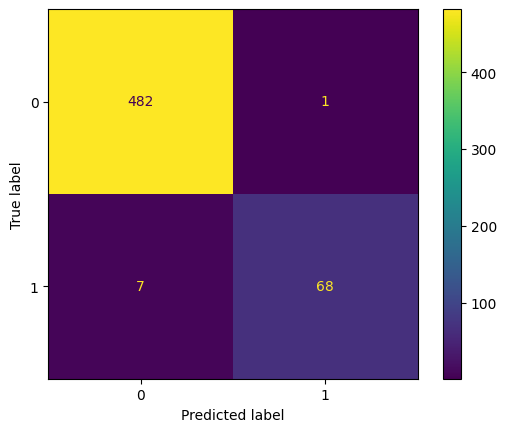

In [43]:
cm = confusion_matrix(results["test"], results["pred"])
ConfusionMatrixDisplay(cm).plot()
plt.show()

Sur l'ensemble de test, le modèle s'est trompé 8 fois :
- il y a 7 spams, sur un total de 75 spams, qu'il n'a pas catégorisé comme spam
- il y a 1 message, sur un total de 483 messages, qu'il a catégorisé comme spam

# Partie 3 : Reseau de neurones importé (Transfert Learning)

D'après les recherches que j'ai faites, on peut utiliser le modèle electra pour créer un modèle de détection de spams. \
Pour appliquer ce modèle, il faut que les phrases aient subi un preprocessing BERT.

In [44]:
pip install tensorflow-text

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 22.9 MB/s eta 0:00:00


In [45]:
import tensorflow_hub as hub
import tensorflow_text as text

In [46]:
def build_electra_model():
  text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text') # Couche d'entrée qui acceptent les chaines de caractères
  preprocessor = hub.KerasLayer(
    "https://kaggle.com/models/tensorflow/bert/frameworks/TensorFlow2/variations/en-uncased-preprocess/versions/3")
  encoder_inputs = preprocessor(text_input) # On convertit nos phrases en une forme que le modèle BERT peut comprendre
  encoder = hub.KerasLayer(
    "https://www.kaggle.com/models/google/electra/frameworks/tensorFlow2/variations/small/versions/2",
    trainable=False, name='electra')
  outputs = encoder(encoder_inputs) # On applique le modèle electra (remplace la couche Embedding)
  out = outputs['pooled_output'] # On extrait les sorties du modèle electra
  new = tf.keras.layers.Dense(64, activation='relu')(out) # On ajoute une couche Dense avec 64 neurones pour réduire la dimensionalité des sorties du modèle electra
  clf = tf.keras.layers.Dense(1, activation='sigmoid', name='classifier')(new) # On fait notre classification
  return tf.keras.Model(text_input, clf)


In [47]:
electra_model = build_electra_model()
electra_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 text (InputLayer)           [(None,)]                    0         []                            
                                                                                                  
 keras_layer (KerasLayer)    {'input_word_ids': (None,    0         ['text[0][0]']                
                             128),                                                                
                              'input_type_ids': (None,                                            
                             128),                                                                
                              'input_mask': (None, 128)                                           
                             }                                                                

On compile notre modèle.

In [48]:
electra_model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy()])

On entraine notre modèle. Pour cela, il va falloir que l'on crée des batchs avec les phrases non encodés !

In [49]:
Raw_train, Raw_val, y_train, y_val = train_test_split(dataset_clean["message_clean"], dataset_clean["target_num"], test_size=0.2, random_state=42, stratify=dataset_clean["target"])
Raw_val, Raw_test, y_val, y_test = train_test_split(Raw_val, y_val, test_size=0.5, random_state=42, stratify=y_val)

Raw_train_ds = tf.data.Dataset.from_tensor_slices((Raw_train, y_train))
Raw_val_ds = tf.data.Dataset.from_tensor_slices((Raw_val, y_val))
Raw_test_ds = tf.data.Dataset.from_tensor_slices((Raw_test, y_test))

Raw_train_batch = Raw_train_ds.shuffle(len(Raw_train_ds)).batch(64)
Raw_val_batch = Raw_val_ds.shuffle(len(Raw_val_ds)).batch(64)
Raw_test_batch = Raw_test_ds.shuffle(len(Raw_val_ds)).batch(64)

In [50]:
history = electra_model.fit(x=Raw_train_batch, epochs=15, validation_data=Raw_val_batch)

Epoch 1/15
70/70 [==============================] - 35s 334ms/step - loss: 0.2155 - binary_accuracy: 0.9199 - val_loss: 0.1301 - val_binary_accuracy: 0.9623
Epoch 2/15
70/70 [==============================] - 22s 321ms/step - loss: 0.1031 - binary_accuracy: 0.9666 - val_loss: 0.0984 - val_binary_accuracy: 0.9677
Epoch 3/15
70/70 [==============================] - 23s 336ms/step - loss: 0.0867 - binary_accuracy: 0.9729 - val_loss: 0.0910 - val_binary_accuracy: 0.9713
Epoch 4/15
70/70 [==============================] - 25s 354ms/step - loss: 0.0763 - binary_accuracy: 0.9749 - val_loss: 0.0932 - val_binary_accuracy: 0.9659
Epoch 5/15
70/70 [==============================] - 22s 315ms/step - loss: 0.0727 - binary_accuracy: 0.9785 - val_loss: 0.0770 - val_binary_accuracy: 0.9785
Epoch 6/15
70/70 [==============================] - 22s 317ms/step - loss: 0.0686 - binary_accuracy: 0.9780 - val_loss: 0.0744 - val_binary_accuracy: 0.9749
Epoch 7/15
70/70 [==============================] - 22s 31

Regardons les courbes de perte et d'accuracy en fonction de l'epoch.

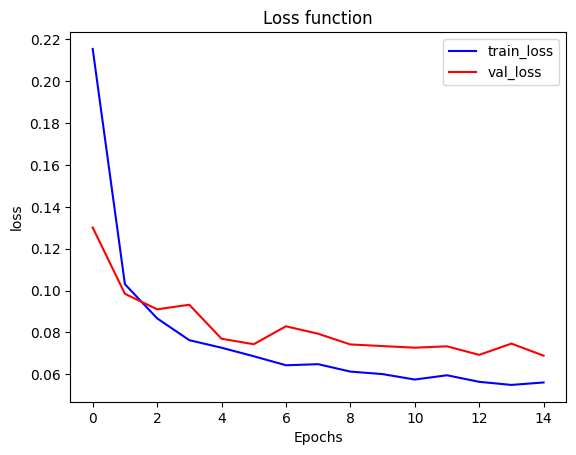

In [51]:
plt.plot(history.history["loss"], color="b", label="train_loss")
plt.plot(history.history["val_loss"], color="r", label="val_loss")
plt.ylabel("loss")
plt.xlabel("Epochs")
plt.title("Loss function")
plt.legend()
plt.show()

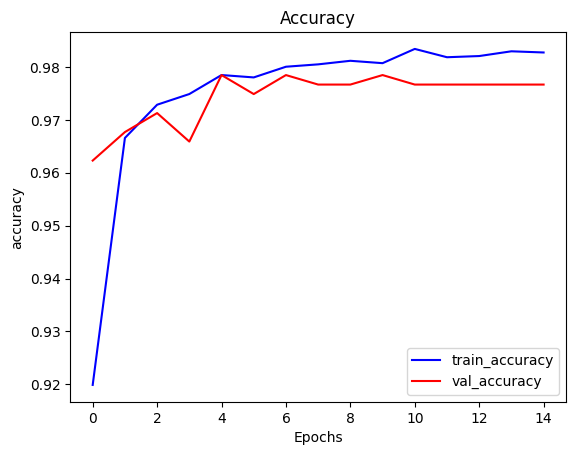

In [52]:
plt.plot(history.history["binary_accuracy"], color="b", label="train_accuracy")
plt.plot(history.history["val_binary_accuracy"], color="r", label="val_accuracy")
plt.ylabel("accuracy")
plt.xlabel("Epochs")
plt.title("Accuracy")
plt.legend()
plt.show()

Les scores sont bons ! On remarque que par rapport au modèle de la partie 2, l'écart entre la train loss function et la val loss fonction n'augmente pas autant. De plus, on voit que la val_accuracy stagne à la même valeur entre l'epoch 11 et l'epoch 15, un peu comme si nous avions atteint un plafond de verre. \
Sauvegardons puis restaurons ce modèle.

In [59]:
# Sauvegrade du modèle
# electra_model.save("/data/electra_model.h5")

electra_model = tf.keras.models.load_model("/data/electra_model.h5", custom_objects = {"KerasLayer" : hub.KerasLayer})

Faisons des prédictions sur le test set et regardons les scores.

In [60]:
predictions = electra_model.predict(Raw_test)
predictions = predictions.reshape(-1)
results = pd.DataFrame({"test" : y_test, "pred" : predictions})
results["pred"] = round(results["pred"])
print(classification_report(results["test"], results["pred"]))

18/18 [==============================] - 3s 108ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       483
           1       0.93      0.91      0.92        75

    accuracy                           0.98       558
   macro avg       0.96      0.95      0.95       558
weighted avg       0.98      0.98      0.98       558



Le f1-score du modèle est très bon ! \
Regardons la matrice de confusion.

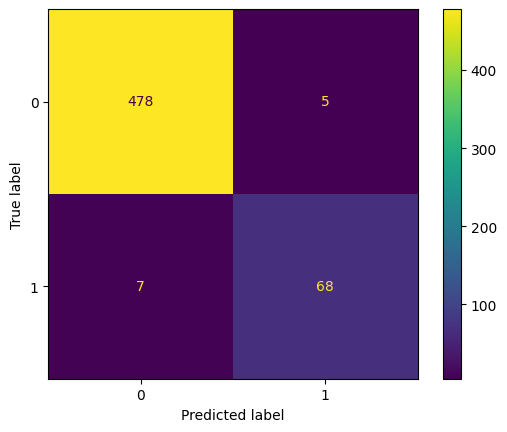

In [61]:
cm = confusion_matrix(results["test"], results["pred"])
ConfusionMatrixDisplay(cm).plot()
plt.show()

Sur l'ensemble de test, le modèle s'est trompé 12 fois :

- il y a 7 spams, sur un total de 75 spams, qu'il n'a pas catégorisé comme spam
- il y a 5 messages, sur un total de 483 messages, qu'il a catégorisé comme spam